<a href="https://colab.research.google.com/github/Muzaki28/2106060/blob/main/UAS_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold


In [ ]:
df_test = pd.read_csv('laptops_test.csv', sep = ',')
df = pd.read_csv('laptops_train.csv', sep = ',')

In [ ]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


In [ ]:
dict = {}

for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict, index = ['unique_count']).transpose()

,unique_count
Manufacturer,19
Model Name,488
Category,6
Screen Size,18
Screen,38
CPU,106
RAM,8
Storage,36
GPU,98
Operating System,7


In [ ]:
df.describe()

,Price
count,9.770000e+02
mean,1.001899e+07
std,6.306430e+06
min,1.706375e+06
25%,5.326308e+06
50%,8.527428e+06
75%,1.311570e+07
max,5.423231e+07


In [ ]:
df.dtypes

Manufacturer                 object
Model Name                   object
Category                     object
Screen Size                  object
Screen                       object
CPU                          object
RAM                          object
 Storage                     object
GPU                          object
Operating System             object
Operating System Version     object
Weight                       object
Price                       float64
dtype: object

In [ ]:
(df.isnull().sum()/len(df))

Manufacturer                0.000000
Model Name                  0.000000
Category                    0.000000
Screen Size                 0.000000
Screen                      0.000000
CPU                         0.000000
RAM                         0.000000
 Storage                    0.000000
GPU                         0.000000
Operating System            0.000000
Operating System Version    0.139202
Weight                      0.000000
Price                       0.000000
dtype: float64

In [ ]:
df['Operating System Version']=df['Operating System Version'].fillna(df['Operating System Version'].mode()[0])
df_test['Operating System Version']=df_test['Operating System Version'].fillna(df_test['Operating System Version'].mode()[0])

In [ ]:
(df.isnull().sum()/len(df))

Manufacturer                0.0
Model Name                  0.0
Category                    0.0
Screen Size                 0.0
Screen                      0.0
CPU                         0.0
RAM                         0.0
 Storage                    0.0
GPU                         0.0
Operating System            0.0
Operating System Version    0.0
Weight                      0.0
Price                       0.0
dtype: float64

In [ ]:
df['Weight'].replace(to_replace='kg', value='', regex=True, inplace=True)
df_test['Weight'].replace(to_replace='kg', value='', regex=True, inplace=True)
df_test['Weight'].replace(to_replace='s', value='', regex=True, inplace=True)

In [ ]:
df['Weight'] = df['Weight'].astype("float64")
df_test['Weight'] = df_test['Weight'].astype("float64")

In [ ]:
df['Model_name_avg'] = df.groupby(['Model Name'])['Price'].transform('median').round(2)
df['CPU_avg'] = df.groupby(['CPU'])['Price'].transform('median').round(2)
df['GPU_avg'] = df.groupby(['GPU'])['Price'].transform('median').round(2)

df_test['Model_name_avg'] = df_test.groupby(['Model Name'])['Price'].transform('median').round(2)
df_test['CPU_avg'] = df_test.groupby(['CPU'])['Price'].transform('median').round(2)
df_test['GPU_avg'] = df_test.groupby(['GPU'])['Price'].transform('median').round(2)

In [ ]:
def group(value):
    if value >= 25000000:
        return 0
    elif value >= 20000000  and value < 25000000:
        return 1
    elif value >= 15000000  and value < 20000000:
        return 2
    elif value >= 10000000  and value < 15000000:
        return 3
    else:
        return 4

In [ ]:
df['model_name_group'] = df.apply(lambda x: group(x['Model_name_avg']),axis=1)
df['cpu_group'] = df.apply(lambda x: group(x['CPU_avg']),axis=1)
df['gpu_group'] = df.apply(lambda x: group(x['GPU_avg']),axis=1)

df_test['model_name_group'] = df_test.apply(lambda x: group(x['Model_name_avg']),axis=1)
df_test['cpu_group'] = df_test.apply(lambda x: group(x['CPU_avg']),axis=1)
df_test['gpu_group'] = df_test.apply(lambda x: group(x['GPU_avg']),axis=1)

In [ ]:
#df = df.drop(['Model Name', 'CPU', 'GPU', 'Model_name_avg', 'CPU_avg', 'GPU_avg'], axis = 1)
#df_test = df_test.drop(['Model Name', 'CPU', 'GPU', 'Model_name_avg', 'CPU_avg', 'GPU_avg'], axis = 1)

<Axes: title={'center': 'Variable Category'}, xlabel='Category', ylabel='count'>

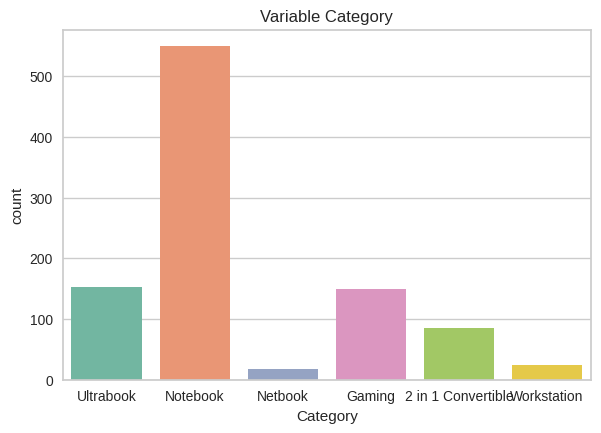

In [ ]:
plt.figure(figsize = (15, 10))

plt.subplot(2, 2, 1)
plt.gca().set_title('Variable Category')
sns.countplot(x = 'Category', palette = 'Set2', data = df)

<Axes: title={'center': 'Variable Ram'}, xlabel='RAM', ylabel='count'>

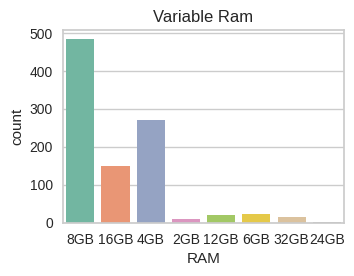

In [ ]:
plt.subplot(2, 2, 2)
plt.gca().set_title('Variable Ram')
sns.countplot(x = 'RAM', palette = 'Set2', data = df)

<Axes: title={'center': 'Variable Operating System'}, xlabel='Operating System', ylabel='count'>

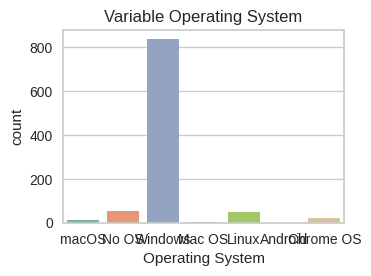

In [ ]:
plt.subplot(2, 2, 3)
plt.gca().set_title('Variable Operating System')
sns.countplot(x = 'Operating System', palette = 'Set2', data = df)

<Axes: title={'center': 'Variable Operating System Version'}, xlabel='Operating System Version', ylabel='count'>

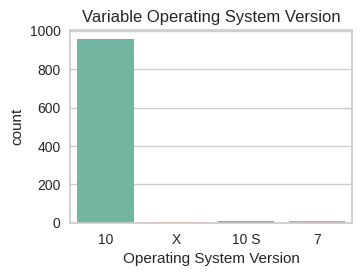

In [ ]:
plt.subplot(2, 2, 4)
plt.gca().set_title('Variable Operating System Version')
sns.countplot(x = 'Operating System Version', palette = 'Set2', data = df)

<Axes: title={'center': 'Variable Manufacturer'}, xlabel='Manufacturer', ylabel='count'>

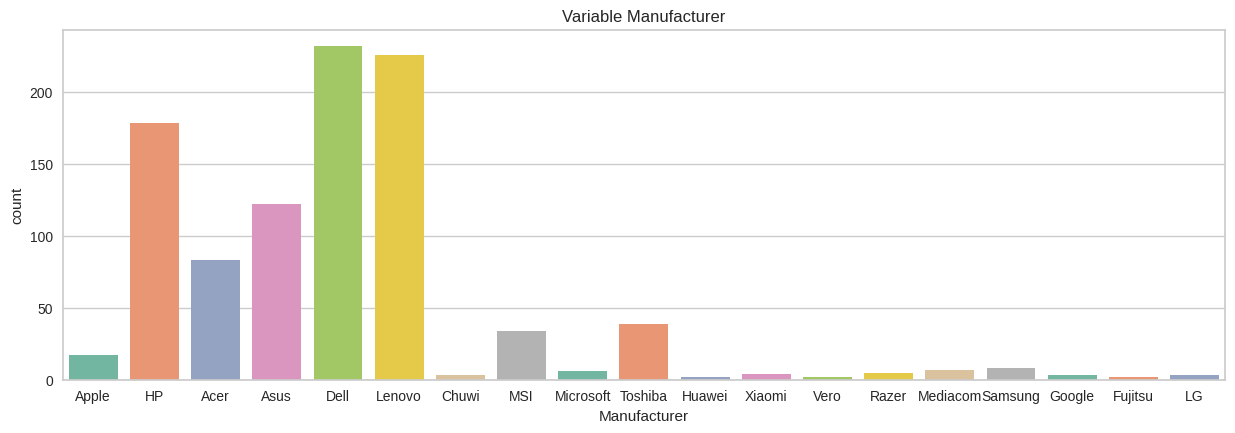

In [ ]:
plt.figure(figsize = (15, 10))

plt.subplot(2, 1, 1)
plt.gca().set_title('Variable Manufacturer')
sns.countplot(x = 'Manufacturer', palette = 'Set2', data = df)

<Axes: title={'center': 'Variable Screen Size'}, xlabel='Screen Size', ylabel='count'>

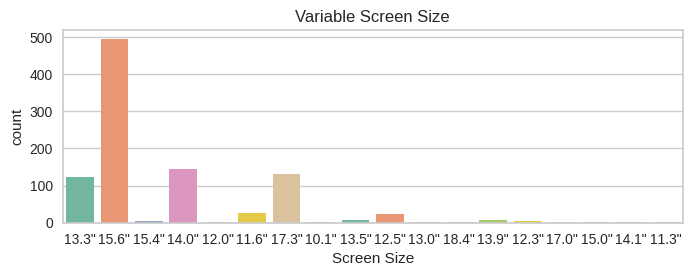

In [ ]:
plt.subplot(2, 1, 2)
plt.gca().set_title('Variable Screen Size')
sns.countplot(x = 'Screen Size', palette = 'Set2', data = df)

<Axes: xlabel='Manufacturer', ylabel='Screen'>

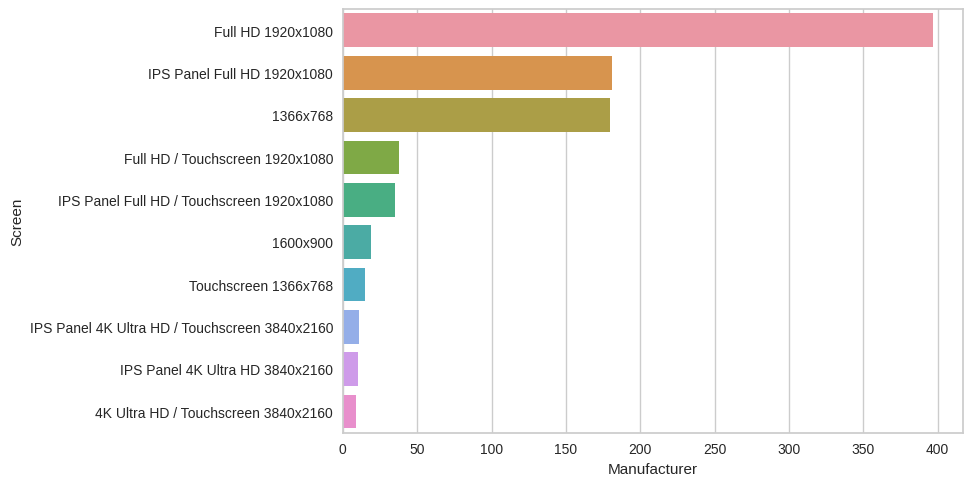

In [ ]:
screen = df[['Screen','Manufacturer']].groupby('Screen').agg('count').sort_values('Manufacturer', ascending=False).reset_index()
sns.barplot(data=screen.head(10), x="Manufacturer", y="Screen")

<Axes: xlabel='Manufacturer', ylabel='CPU'>

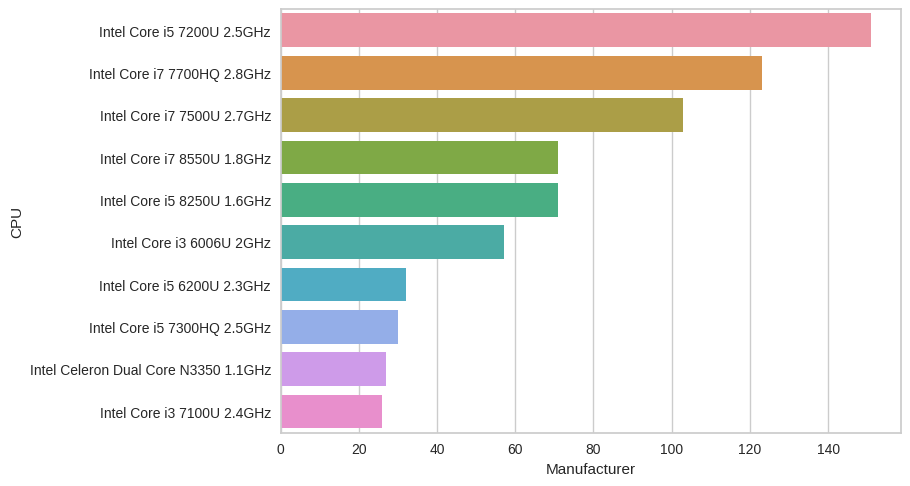

In [ ]:
cpu = df[['CPU','Manufacturer']].groupby('CPU').agg('count').sort_values('Manufacturer', ascending=False).reset_index()
sns.barplot(data=cpu.head(10), x="Manufacturer", y="CPU")

<Axes: xlabel='Manufacturer', ylabel='GPU'>

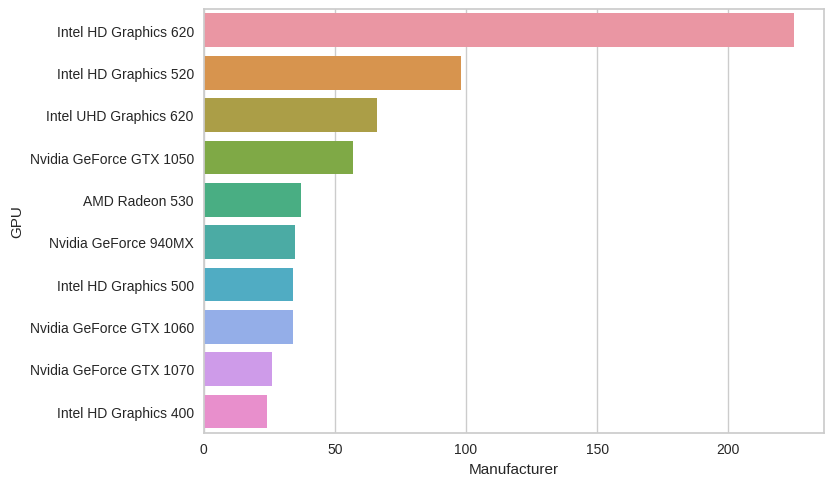

In [ ]:
gpu = df[['GPU','Manufacturer']].groupby('GPU').agg('count').sort_values('Manufacturer', ascending=False).reset_index()
sns.barplot(data=gpu.head(10), x="Manufacturer", y="GPU")

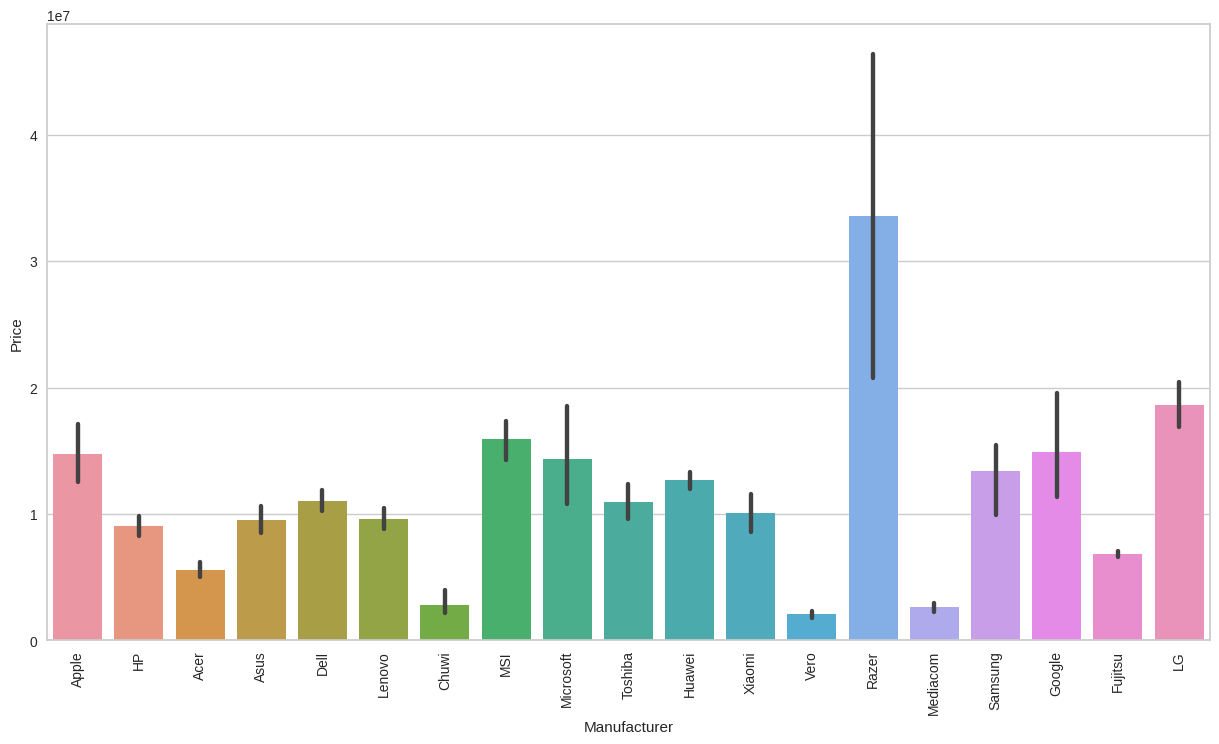

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x = df['Manufacturer'], y = df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df = df.drop(['Model Name', 'CPU', 'GPU', 'Model_name_avg', 'CPU_avg', 'GPU_avg'], axis = 1)
df_test = df_test.drop(['Model Name', 'CPU', 'GPU', 'Model_name_avg', 'CPU_avg', 'GPU_avg'], axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder_Manufacturer = LabelEncoder()
label_encoder_Category = LabelEncoder()
label_encoder_Screen_Size = LabelEncoder()
label_encoder_Screen = LabelEncoder()
label_encoder_RAM = LabelEncoder()
label_encoder_Storage = LabelEncoder()
label_encoder_Operating_System = LabelEncoder()
label_encoder_Operating_System_Version = LabelEncoder()

df['Manufacturer'] = label_encoder_Manufacturer.fit_transform(df['Manufacturer'])
df['Category'] = label_encoder_Category.fit_transform(df['Category'])
df['Screen Size'] = label_encoder_Screen_Size.fit_transform(df['Screen Size'])
df['Screen'] = label_encoder_Screen.fit_transform(df['Screen'])
df['RAM'] = label_encoder_RAM.fit_transform(df['RAM'])
df[' Storage'] = label_encoder_Storage.fit_transform(df[' Storage'])
df['Operating System'] = label_encoder_Operating_System.fit_transform(df['Operating System'])
df['Operating System Version'] = label_encoder_Operating_System_Version.fit_transform(df['Operating System Version'])

df_test['Manufacturer'] = label_encoder_Manufacturer.fit_transform(df_test['Manufacturer'])
df_test['Category'] = label_encoder_Category.fit_transform(df_test['Category'])
df_test['Screen Size'] = label_encoder_Screen_Size.fit_transform(df_test['Screen Size'])
df_test['Screen'] = label_encoder_Screen.fit_transform(df_test['Screen'])
df_test['RAM'] = label_encoder_RAM.fit_transform(df_test['RAM'])
df_test[' Storage'] = label_encoder_Storage.fit_transform(df_test[' Storage'])
df_test['Operating System'] = label_encoder_Operating_System.fit_transform(df_test['Operating System'])
df_test['Operating System Version'] = label_encoder_Operating_System_Version.fit_transform(df_test['Operating System Version'])

In [ ]:
X_train = df.drop('Price', axis = 1)
X_train = X_train.values
y_train = df['Price']
X_test = df_test.drop('Price', axis = 1)
X_test = X_test.values
y_test = df_test['Price']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard_train = scaler.fit_transform(X_train)
y_standard_train = scaler.fit_transform(y_train.values.reshape(-1,1))
X_standard_test = scaler.fit_transform(X_test)
y_standard_test = scaler.fit_transform(y_test.values.reshape(-1,1))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'n_estimators': [100],
              'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['squared_error', 'absolute_error', 'friedman_mse']
             }

model = RandomForestRegressor()
gridRandomForest = RandomizedSearchCV(model,parameters, cv = 2)
gridRandomForest.fit(X_train, y_train.ravel())

print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  squared_error
Score:  0.8764130606420937
Mín Split:  7
Max Nvl:  9


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 100, min_samples_split = 2,
max_depth= 7,  criterion = 'squared_error', random_state = 0)
regressor_rf.fit(X_train, y_train)
normal_rf = regressor_rf.score(X_train, y_train)
normal_rf_test = regressor_rf.score(X_test, y_test)
previsoes = regressor_rf.predict(X_test)
mae_normal_rf  = mean_absolute_error(y_test, previsoes)
mse_lr_normal_rf = mean_squared_error(y_test, previsoes)
rmse_normal_rf = np.sqrt(mean_squared_error(y_test, previsoes))
r2_lr_normal_rf = r2_score(y_test, previsoes)

print('Train : ', normal_rf)
print('Test :', normal_rf_test)
print('MAE :', mae_normal_rf)
print('MSE :', mse_lr_normal_rf)
print('RMSE :', rmse_normal_rf)
print('R2 :', r2_lr_normal_rf)

Train :  0.957658607401638
Test : 0.8180228352184167
MAE : 1816206.923974398
MSE : 6407989432601.419
RMSE : 2531400.68590522
R2 : 0.8180228352184167
